# Neural Nets: Step by step

Seth Weidman    

06/15/2017

# What we're going to do:

## What we're going to do:

* Walk through this diagram and understand what is going on:

<img src='img/neural_net_basic.png' height=200>

# Let's learn MNIST

## Let's learn MNIST

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
mnist = fetch_mldata('MNIST original') 

## Let's learn MNIST

In [33]:
def get_mnist_X_Y(mnist):
    data = mnist.data
    X = (data - data.min()) * 1.0 / (data.max() - data.min())
    target = mnist.target
    Y = np.zeros((len(target), 10))
    for i in range(len(target)):
        Y[i][int(target[i])] = 1 
    print("Number of images: ", X.shape[0])
    return X, Y

In [34]:
X, Y = get_mnist_X_Y(mnist)

Number of images:  70000


In [35]:
train_prop = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=1-train_prop, 
    random_state=1)

# Neural net, step by step

## Neural net, step by step

Step 1: Randomly shuffle the images in the training set

In [36]:
np.random.seed(2)
train_size = X_train.shape[0]
indices = list(range(train_size))
np.random.shuffle(indices)

In [37]:
i = indices[0]

In [38]:
def visualize_image(index):
    target = mnist.target
    print("Label: ", int(target[index]))
    plt.imshow(1.0 - X[index].reshape(28,28), cmap='gray')
    plt.show() 

Label:  4


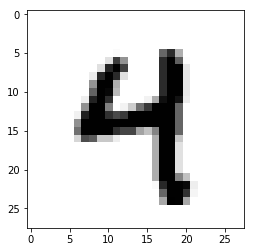

In [39]:
visualize_image(i)

In [40]:
x = np.array(X[i], ndmin=2)

## Neural net, step by step

Step 2: multiply this image by the first set of weights:

In [41]:
V = np.random.randn(784, 50)

In [42]:
A = np.dot(x,V)

Now, we have transformed the 784 dimensional images into 50 "hidden features".

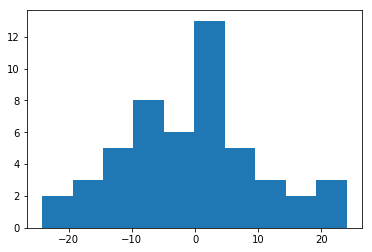

In [43]:
plt.hist(A[0]);

## Neural net, step by step

**An intuition of what matrix multiplication does.**

Let's say that each observation had three features $x_1$, $x_2$, and $x_3$, and we wanted to transform these three features into four hidden features, $a_1$, $a_2$, $a_3$, and $a_4$. How would we do this?

Since we're transforming three features into four features, we'll use a 3 x 4 matrix to do this:

$$ V = \begin{bmatrix}v_{11} & v_{12} & v_{13} & v_{14} \\
                      v_{21} & v_{22} & v_{23} & v_{24} \\
                      v_{31} & v_{32} & v_{33} & v_{34}
                      \end{bmatrix} $$

And we would actually do the transformation as follows:

$$ x_1 * v_{11} + x_2 * v_{21} + x_3 * v_{31} = a_1 $$
$$ x_1 * v_{12} + x_2 * v_{22} + x_3 * v_{32} = a_2 $$
$$ x_1 * v_{13} + x_2 * v_{23} + x_3 * v_{33} = a_3 $$
$$ x_1 * v_{14} + x_2 * v_{24} + x_3 * v_{34} = a_4 $$

This shows concretely that _each one of the hidden features is just a linear combination of the original features of your data_.

## Neural net, step by step

**Step 3: feed these hidden features through the sigmoid**

Refresher on the sigmoid

In [44]:
def _sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

If we only had four hidden features, the transformation would simply be:

$$ B = \sigma(A) $$ or

$$ b_1 = \sigma(a_1) $$
$$ b_2 = \sigma(a_2) $$
$$ b_3 = \sigma(a_3) $$
$$ b_4 = \sigma(a_4) $$

In [45]:
B = _sigmoid(A)

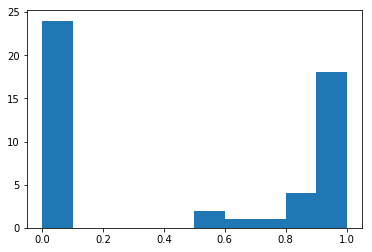

In [46]:
plt.hist(B[0]);

## Neural net, step by step

**Step 4: multiply these sigmoided results by another matrix**

In [47]:
W = np.random.randn(50, 10)
C = np.dot(B,W)

In [48]:
C[0]

array([ 2.73036122,  2.40426708,  4.76437904,  0.4518629 , -3.73355318,
       -1.46404718, -3.8039577 , -4.96813394, -1.81652786, -0.16892414])

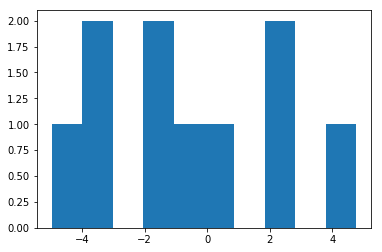

In [49]:
plt.hist(C[0]);

**Step 4: multiply these sigmoided results by another matrix**

Again, suppose that we had four hidden features, and we wanted to combine them down into one final prediction, with a second set of weights, $W$:

$$ W = \begin{bmatrix}w_{11} \\
                      w_{21} \\
                      w_{31} \\
                      w_{41}
                      \end{bmatrix} $$

We would do it as follows:

$$ C = C(B, W) $$ or

$$ c_1 = w_{11} * b_1 + w_{21} * b_2 + w_{31} * b_3 + w_{41} * b_4 $$

## Neural net, step by step

**Step 5: Feed this through a sigmoid:**

In [50]:
P = _sigmoid(C)

Mathematically this is just:

$ P_1 = \sigma(c_1) $

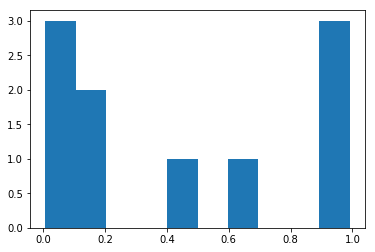

In [51]:
plt.hist(P[0]);

In [52]:
# TODO: Normalize P
P[0]

array([ 0.9387946 ,  0.91715211,  0.99154393,  0.61108206,  0.0233495 ,
        0.1878491 ,  0.02179673,  0.00690806,  0.13985102,  0.4578691 ])

## Neural net, step by step

**Step 5: Compute the loss:**

Mathematically, we'll compute mean squared error loss:

$$ L_1 = \frac{1}{2}(y - P_1)^2 $$

In [53]:
y = np.array(Y[i], ndmin=2)
L = 0.5 * (y - P) ** 2

In [54]:
L

array([[  4.40667647e-01,   4.20583998e-01,   4.91579685e-01,
          1.86710644e-01,   4.76923097e-01,   1.76436422e-02,
          2.37548642e-04,   2.38606685e-05,   9.77915447e-03,
          1.04822057e-01]])

## Neural net, step by step

**Step 6: Backpropogate, step 1:**

$$ \frac{\partial L}{\partial P} = -1.0 * (y - P) $$

In [55]:
dLdP = -1.0 * (y-P)
dLdP

array([[ 0.9387946 ,  0.91715211,  0.99154393,  0.61108206, -0.9766505 ,
         0.1878491 ,  0.02179673,  0.00690806,  0.13985102,  0.4578691 ]])

## Neural net, step by step

**Step 7: Backpropogate, step 2:**

**Digression on the sigmoid function:**

If

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Then 

$$\sigma'(x) = \sigma(x) * (1 - \sigma(x))$$

So, since:

$$ P = \sigma(C) $$

that means:

$$ \frac{\partial P}{\partial C} = \sigma(C) * (1 - \sigma(C)) $$

And by the chain rule (we'll use this over and over again):

$$ \frac{\partial L}{\partial C} = \frac{\partial L}{\partial P} * \frac{\partial P}{\partial C} $$
$$ \frac{\partial L}{\partial C} =  -1.0 * (y-P) * \sigma(C) * (1 - \sigma(C)) $$

In [56]:
dPdC = _sigmoid(C) * (1-_sigmoid(C))
dLdC = dLdP * dPdC
dLdC

array([[  5.39424826e-02,   6.96889923e-02,   8.31366190e-03,
          1.45230237e-01,  -2.22718340e-02,   2.86585998e-02,
          4.64741718e-04,   4.73916751e-05,   1.68230594e-02,
          1.13654552e-01]])

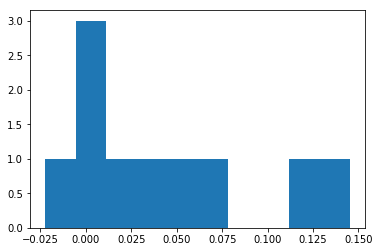

In [57]:
plt.hist(dLdC[0]);

## Neural net, step by step

**Step 8: Backpropogate, step 3:**

Recall that, in our simple example with only four neurons in the hidden layer:

$$ c_1 = w_{11} * b_1 + w_{21} * b_2 + w_{31} * b_3 + w_{41} * b_4 $$

This can also be written as:

$$ \begin{bmatrix}b_1 &&
                  b_2 &&
                  b_3 &&
                  b_4\end{bmatrix} * \begin{bmatrix}w_{11} \\
                  w_{21} \\
                  w_{31} \\
                  w_{41}
                  \end{bmatrix} $$

Now recall that by 

$$ \frac{\partial C}{\partial W} $$

we mean:

$$ \begin{bmatrix}\frac{\partial C}{\partial w_{11}} \\
                  \frac{\partial C}{\partial w_{21}} \\
                  \frac{\partial C}{\partial w_{31}} \\
                  \frac{\partial C}{\partial w_{41}}
                  \end{bmatrix} $$

But, looking at the formula for $C$, this is just 

$$ \begin{bmatrix}b_1 \\
                  b_2 \\
                  b_3 \\
                  b_4
                  \end{bmatrix} $$
                  
or $B^T$. 

Finally, then, we arrive at the elegant formula for the backpropogation at this stage:

$$ \frac{\partial C}{\partial W} = B^T$$

Similarly, we can show that:

$$ \frac{\partial C}{\partial B} = W^T$$

In [58]:
def hist_weight_update(update):
    plt.hist(update.reshape(update.shape[0] * update.shape[1]));

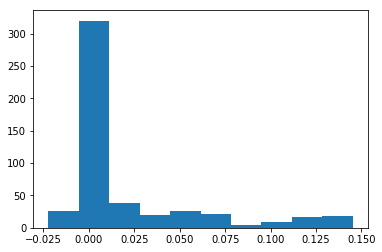

In [59]:
dCdW = B.T
dLdW = np.dot(dCdW, dLdC)
plt.hist(dLdW.reshape(W.shape[0] * W.shape[1]));

## Neural net, step by step

**Step 9: Backpropogate, step 4:**

Again, because:

$$ \frac{\partial C}{\partial B} = W^T $$

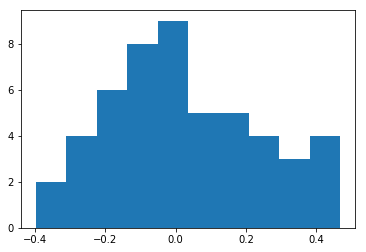

In [60]:
dCdB = W.T
dLdB = np.dot(dLdC, dCdB)
plt.hist(dLdB[0]);

## Neural net, step by step

**Step 10: backpropogate, step 5:**

As before, since:

$$ B = \sigma(A) $$

This means:

$$ \frac{\partial B}{\partial A} = \sigma(A) * (1 - \sigma(A)) $$

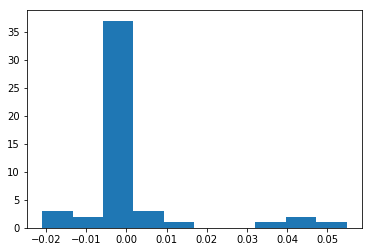

In [61]:
dBdA = _sigmoid(A) * (1-_sigmoid(A))
dLdA = dLdB * dBdA
plt.hist(dLdA[0]);

## Neural net, step by step

**Step 11: backpropogate, step 6:**

Now, recall that before, in our three input feature-four hidden feature example,

And we would actually do the transformation as follows:

$$ x_1 * v_{11} + x_2 * v_{21} + x_3 * v_{31} = a_1 $$
$$ x_1 * v_{12} + x_2 * v_{22} + x_3 * v_{32} = a_2 $$
$$ x_1 * v_{13} + x_2 * v_{23} + x_3 * v_{33} = a_3 $$
$$ x_1 * v_{14} + x_2 * v_{24} + x_3 * v_{34} = a_4 $$

So, in calculating:

$$ \frac{\partial A}{\partial V} $$

which is really just syntax for:

$$ \begin{bmatrix}\frac{\partial A}{\partial v_{11}} & \frac{\partial A}{\partial v_{12}} & \frac{\partial A}{\partial v_{13}} & \frac{\partial A}{\partial v_{14}} \\
\frac{\partial A}{\partial v_{21}} & \frac{\partial A}{\partial v_{22}} & \frac{\partial A}{\partial v_{23}} & \frac{\partial A}{\partial v_{24}} \\
\frac{\partial A}{\partial v_{31}} & \frac{\partial A}{\partial v_{32}} & \frac{\partial A}{\partial v_{33}} & \frac{\partial A}{\partial v_{34}} \\
\end{bmatrix} $$

But, note that focusing on just $a_1$ for example:

$$ \frac{\partial a_1}{\partial v_{11}} = x_1 $$
$$ \frac{\partial a_1}{\partial v_{21}} = x_2 $$
$$ \frac{\partial a_1}{\partial v_{31}} = x_3 $$

whereas for $a_2$ and $a_3$

$$ \frac{\partial a_2}{\partial v_{11}} = 0 $$
$$ \frac{\partial a_3}{\partial v_{11}} = 0 $$


So if we write: 
    
$$ A = \begin{bmatrix}a_1 \\ a_2 \\ a_3 \\ a_4 \end{bmatrix} $$

$$ \frac{\partial A}{\partial V} = \begin{bmatrix}
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix} &
   \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}\end{bmatrix} $$

Which in terms of the matrix multiplication that results is the same as writing just:

$$ \frac{\partial A}{\partial V} = X^T $$

In [62]:
dAdV = x.T
dLdV = np.dot(dAdV, dLdA)
dLdV.shape

(784, 50)

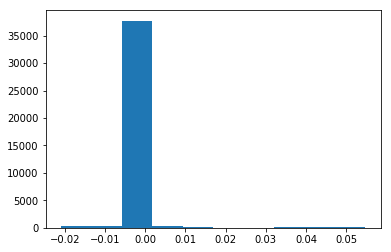

In [63]:
hist_weight_update(dLdV);

## Neural net, step by step

**Step 12: Update the weights:**

Now, the following "works" because of the chain rule:

$$ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial P} * 
\frac{\partial P}{\partial C} *
\frac{\partial C}{\partial W}$$

$$ \frac{\partial L}{\partial V} = \frac{\partial L}{\partial P} * 
\frac{\partial P}{\partial C} *
\frac{\partial C}{\partial B} * 
\frac{\partial B}{\partial A} * 
\frac{\partial A}{\partial W} $$

In [64]:
W -= dLdW
V -= dLdV

In [299]:
# Randomly shuffle the indices of the points in the training set:
np.random.seed(2)
train_size = X_train.shape[0]
indices = list(range(train_size))
np.random.shuffle(indices)

## Turning this into a function:

In [300]:
def learn(X, Y, start_index, num_iter, V=None, W=None, num_epoch=1):
    now = time.time()
    np.random.seed(3)
    if V is None:
        V = np.random.randn(784, 50)
    if W is None:
        W = np.random.randn(50, 10)
    for j in range(start_index, start_index + num_iter):
        i = indices[j]
        x = np.array(X[i], ndmin=2)
        y = np.array(Y[i], ndmin=2)
        A = np.dot(x,V)
        B = _sigmoid(A)
        C = np.dot(B,W)
        P = _sigmoid(C)
        L = 0.5 * (y - P) ** 2
        iteration_loss = np.sum(L)
        dLdP = -1.0 * (y - P)
        dPdC = _sigmoid(C) * (1-_sigmoid(C))
        dLdC = dLdP * dPdC
        dCdW = B.T
        dLdW = np.dot(dCdW, dLdC)
        dCdB = W.T
        dLdB = np.dot(dLdC, dCdB)
        dBdA = _sigmoid(A) * (1-_sigmoid(A))
        dLdA = dLdB * dBdA
        dAdV = x.T
        dLdV = np.dot(dAdV, dLdA)
        W -= dLdW
        V -= dLdV
    end = time.time()
#     print("# of seconds to do",
#           num_iter,
#           "iterations:",
#           round(end - now, 2))
    return V, W

In [301]:
def predict(X, V, W):
    A = np.dot(X,V)
    B = _sigmoid(A)
    C = np.dot(B,W)
    P = _sigmoid(C)
    return P

In [302]:
def accuracy(P, Y_test, loss=False):
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]
    
    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)

    if loss:
        loss_vector = [prob - obs for prob, obs in zip(P, Y_test)]
        squared_loss = [x ** 2 for x in loss_vector]
        total_loss = np.mean([np.sum(x) for x in squared_loss])
        return accuracy, total_loss

    return accuracy

## Turning this into a function:

In [303]:
df_data = pd.DataFrame(index=[0], columns=['iterations', 
                                           'test_accuracy',
                                           'train_accuracy', 
                                           'test_loss'])
train_size = X_train.shape[0]
num_iter=1000
num_iter_total = 0
for i in range(int(train_size / num_iter)):
    if i == 0:
        V, W = learn(X_train, Y_train, num_iter_total, num_iter, V=None, W=None)
    else:
        V, W = learn(X_train, Y_train, num_iter_total, num_iter, V=V, W=W)
        
    P_test = predict(X_test, V, W)
    P_train = predict(X_train, V, W)
    test_accuracy, test_loss = accuracy(P_test, Y_test, loss=True)
    if num_iter_total % 7000 == 0:
        print("Loss after", num_iter_total, 
              "iterations is", np.round(test_loss, 3))
    train_accuracy = accuracy(P_train, Y_train)
    num_iter_total += num_iter
    df_data.loc[i, :] = [num_iter_total,
                         test_accuracy,
                         train_accuracy, 
                         test_loss]    

Loss after 0 iterations is 0.748
Loss after 7000 iterations is 0.397
Loss after 14000 iterations is 0.209
Loss after 21000 iterations is 0.195
Loss after 28000 iterations is 0.176
Loss after 35000 iterations is 0.165
Loss after 42000 iterations is 0.172
Loss after 49000 iterations is 0.162
Loss after 56000 iterations is 0.17


In [304]:
df_data

,iterations,test_accuracy,train_accuracy,test_loss
0,1000,0.368571,0.365333,0.748181
1,2000,0.465286,0.466016,0.665888
2,3000,0.549714,0.548937,0.587754
3,4000,0.613143,0.617317,0.526804
4,5000,0.676143,0.676095,0.431068
5,6000,0.680857,0.683444,0.420249
6,7000,0.700143,0.705365,0.417511
7,8000,0.737714,0.743492,0.397002
8,9000,0.820857,0.82381,0.314669
9,10000,0.833286,0.839095,0.272219


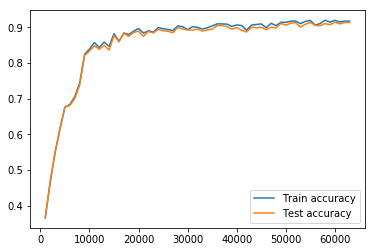

In [305]:
plt.plot(df_data.iterations, df_data.train_accuracy)
plt.plot(df_data.iterations, df_data.test_accuracy);
plt.legend(['Train accuracy', 'Test accuracy'])

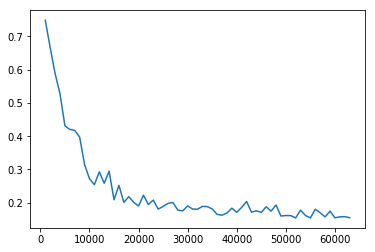

In [306]:
plt.plot(df_data.iterations, df_data.test_loss);

# One layer baseline

In [278]:
def learn_one_layer(X, Y, start_index, num_iter, W=None, num_epoch=1):
    now = time.time()
    np.random.seed(3)
    if W is None:
        W = np.random.randn(784, 10)
    for j in range(start_index, start_index + num_iter):
        i = indices[j]
        x = np.array(X[i], ndmin=2)
        y = np.array(Y[i], ndmin=2)
        A = np.dot(x,W)
        P = _sigmoid(A)
        L = 0.5 * (y - P) ** 2
        iteration_loss = np.sum(L)
        dLdP = -1.0 * (y - P)
        dPdA = _sigmoid(A) * (1-_sigmoid(A))
        dLdA = dLdP * dPdA
        dAdW = x.T
        dLdW = np.dot(dAdW, dLdA)
        W -= dLdW
    return W

In [282]:
def predict_one_layer(X, W):
    A = np.dot(X,W)
    P = _sigmoid(A)
    return P

In [283]:
def accuracy(P, Y_test, loss=False):
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]
    
    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)

    if loss:
        loss_vector = [prob - obs for prob, obs in zip(P, Y_test)]
        squared_loss = [x ** 2 for x in loss_vector]
        total_loss = np.mean([np.sum(x) for x in squared_loss])
        return accuracy, total_loss

    return accuracy

# One layer baseline

In [284]:
df_data = pd.DataFrame(index=[0], columns=['iterations', 
                                           'test_accuracy',
                                           'train_accuracy', 
                                           'test_loss'])
train_size = X_train.shape[0]
num_iter=1000
num_iter_total = 0
for i in range(int(train_size / num_iter)):
    if i == 0:
        W = learn_one_layer(X_train, Y_train, num_iter_total, num_iter, W=None)
    else:
        W = learn_one_layer(X_train, Y_train, num_iter_total, num_iter, W=W)
        
    P_test = predict_one_layer(X_test, W)
    P_train = predict_one_layer(X_train, W)
    test_accuracy, test_loss = accuracy(P_test, Y_test, loss=True)
    if num_iter_total % 7000 == 0:
        print("Loss after", num_iter_total, 
              "iterations is", np.round(test_loss, 3))
    train_accuracy = accuracy(P_train, Y_train)
    num_iter_total += num_iter
    df_data.loc[i, :] = [num_iter_total,
                         test_accuracy,
                         train_accuracy, 
                         test_loss]    

Loss after 0 iterations is 1.105
Loss after 7000 iterations is 0.863
Loss after 14000 iterations is 0.828
Loss after 21000 iterations is 0.833
Loss after 28000 iterations is 0.76
Loss after 35000 iterations is 0.752
Loss after 42000 iterations is 0.641
Loss after 49000 iterations is 0.617
Loss after 56000 iterations is 0.606


In [285]:
df_data

,iterations,test_accuracy,train_accuracy,test_loss
0,1000,0.117286,0.114175,1.10462
1,2000,0.152,0.144794,0.946168
2,3000,0.171286,0.16573,0.921
3,4000,0.177571,0.17446,0.919364
4,5000,0.179286,0.177079,0.920802
5,6000,0.191857,0.188032,0.920305
6,7000,0.176429,0.172968,0.923352
7,8000,0.217143,0.209397,0.862795
8,9000,0.231714,0.22581,0.840973
9,10000,0.229857,0.221317,0.847341


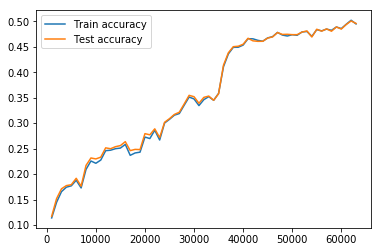

In [286]:
plt.plot(df_data.iterations, df_data.train_accuracy)
plt.plot(df_data.iterations, df_data.test_accuracy);
plt.legend(['Train accuracy', 'Test accuracy'])

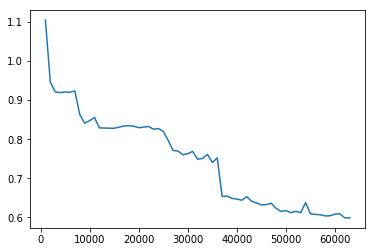

In [287]:
plt.plot(df_data.iterations, df_data.test_loss);

# Understanding the hidden nodes

In [89]:
def subset_number(number, X_test, Y_test):
    actuals = [np.argmax(x) for x in Y_test]
    indices_number = [x == number for x in actuals]
    
    X_test_subset = X_test[indices_number]
    Y_test_subset = Y_test[indices_number]
    
    return X_test_subset, Y_test_subset

In [91]:
x4, y4 = subset_number(4, X_test, Y_test)

In [93]:
A = np.dot(x4,V)
B = _sigmoid(A)

In [106]:
hidden_neurons_4 = np.mean(B, axis=0)

## Understanding the hidden nodes

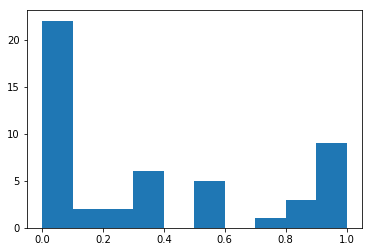

In [288]:
plt.hist(hidden_neurons_4);

In [289]:
np.round(hidden_neurons_4, 2)

array([ 0.34,  0.31,  0.  ,  0.58,  0.97,  0.09,  0.99,  0.89,  0.07,
        1.  ,  0.  ,  0.06,  0.56,  0.36,  0.01,  0.2 ,  0.19,  0.  ,
        0.31,  0.95,  0.  ,  0.95,  0.  ,  0.07,  1.  ,  0.53,  0.5 ,
        0.98,  0.56,  0.32,  0.  ,  0.37,  0.  ,  0.19,  0.  ,  0.03,
        0.  ,  0.03,  0.88,  0.21,  0.8 ,  0.06,  0.05,  0.01,  0.99,
        0.03,  0.01,  0.88,  0.  ,  0.98])

In [290]:
np.argsort(hidden_neurons_4)

array([22, 10, 36, 34, 32, 17, 48,  2, 30, 20, 46, 14, 43, 35, 45, 37, 42,
       41, 11,  8, 23,  5, 16, 33, 15, 39,  1, 18, 29,  0, 13, 31, 26, 25,
       28, 12,  3, 40, 38, 47,  7, 21, 19,  4, 27, 49,  6, 44,  9, 24])

## Understanding the hidden nodes

In [310]:
np.abs(W[:, 4])

array([ 0.99449417,  1.98429933,  2.82371716,  3.48010878,  2.2579907 ,
        0.64772248,  1.17105235,  2.33184894,  0.2572024 ,  1.42756439,
        1.18732571,  0.21992582,  2.30523504,  0.38174461,  2.38507171,
        1.76656724,  2.20976963,  3.12920179,  0.82623126,  3.26569253,
        1.1344759 ,  2.07066254,  3.0663163 ,  0.46234842,  2.56397739,
        1.82419642,  0.43266411,  0.49476118,  1.61181721,  0.36083657,
        7.69405401,  0.42256854,  2.02203338,  1.48895161,  1.18299701,
        1.98468393,  0.73821824,  3.40928235,  2.79826419,  0.08400399,
        1.38695132,  0.5522375 ,  4.43110294,  0.28233517,  1.0401166 ,
        0.19656483,  3.94314668,  0.90369211,  2.98258685,  0.28211424])

In [311]:
np.argsort(np.abs(W[:, 4]), )

array([39, 45, 11,  8, 49, 43, 29, 13, 31, 26, 23, 27, 41,  5, 36, 18, 47,
        0, 44, 20,  6, 34, 10, 40,  9, 33, 28, 15, 25,  1, 35, 32, 21, 16,
        4, 12,  7, 14, 24, 38,  2, 48, 22, 17, 19, 37,  3, 46, 42, 30])

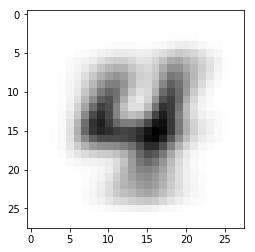

In [308]:
mean_4 = x4.mean(axis=0)
plt.imshow(1.0 - mean_4.reshape(28,28), cmap='gray')

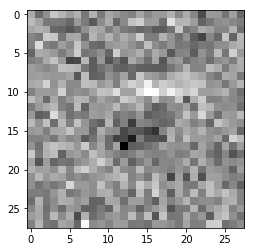

In [240]:
visualize_hidden(30)

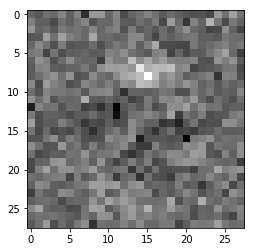

In [241]:
visualize_hidden(42)

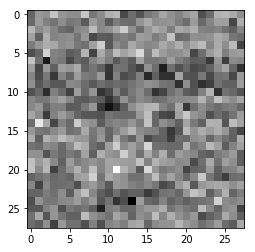

In [242]:
visualize_hidden(46)

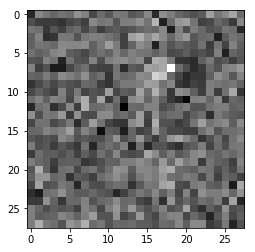

In [243]:
visualize_hidden(3)

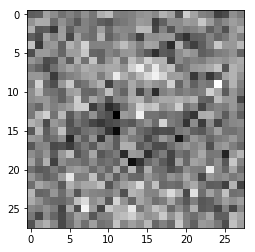

In [244]:
visualize_hidden(37)

## Attempt 2: looking at W

30

In [247]:
W[:, 4]

array([ 0.99449417, -1.98429933, -2.82371716, -3.48010878,  2.2579907 ,
       -0.64772248,  1.17105235,  2.33184894, -0.2572024 , -1.42756439,
       -1.18732571,  0.21992582,  2.30523504, -0.38174461, -2.38507171,
       -1.76656724,  2.20976963, -3.12920179,  0.82623126,  3.26569253,
       -1.1344759 ,  2.07066254, -3.0663163 , -0.46234842, -2.56397739,
        1.82419642, -0.43266411,  0.49476118, -1.61181721, -0.36083657,
       -7.69405401,  0.42256854, -2.02203338, -1.48895161, -1.18299701,
       -1.98468393, -0.73821824, -3.40928235,  2.79826419,  0.08400399,
       -1.38695132, -0.5522375 , -4.43110294,  0.28233517, -1.0401166 ,
       -0.19656483, -3.94314668,  0.90369211, -2.98258685, -0.28211424])

In [248]:
np.argsort(np.abs(W[:, 4]))

array([39, 45, 11,  8, 49, 43, 29, 13, 31, 26, 23, 27, 41,  5, 36, 18, 47,
        0, 44, 20,  6, 34, 10, 40,  9, 33, 28, 15, 25,  1, 35, 32, 21, 16,
        4, 12,  7, 14, 24, 38,  2, 48, 22, 17, 19, 37,  3, 46, 42, 30])

# Delving into the math

## Delving into the math

Recall: each "step" is just a function applied to some input that results in some output.

Going deeper, each individual weight makes a contribution to the loss in some way.

So, say we have a neural net with just one hidden layer. If the loss of a neural net on a given observation $ X $ is: 

$$ L = L(D(C(B(A(X, V)), W))) $$

we can use the chain rule the explicitly compute the loss with respect to each of the individual weights:

## Delving into the math

$$ \frac{\partial L}{\partial W} = \frac{\partial C}{\partial W} * \frac{\partial P}{\partial C} * \frac{\partial L}{\partial P} $$

_Note:_ These are matrix multiplications.

$$ \frac{\partial L}{\partial V} = \frac{\partial A}{\partial V} * \frac{\partial B}{\partial A} * \frac{\partial C}{\partial B} * \frac{\partial P}{\partial C} * \frac{\partial L}{\partial P} $$

_Note:_ To get all the weight updates to line up correctly, some of these are elementwise multiplications and some of these are matrix multiplications.

**Key point:** Each one of these individual computations is actually quite simple. I cover what each one of these is in a blog post [here](http://sethweidman.com/neural_net_post_2) and a SlideShare presentation [here](https://www.slideshare.net/SethHWeidman/neural-nets-from-scratch-72835271).

# Using this to learn MNIST

##  Using this to learn MNIST

**Imports**

In [249]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
import numpy as np
from sklearn.model_selection import train_test_split

##  Using this to learn MNIST

**Read in the MNIST Data**

In [250]:
mnist = fetch_mldata('MNIST original') 

In [251]:
def get_mnist_X_Y(mnist):
    data = mnist.data
    X = (data - data.min()) * 1.0 / (data.max() - data.min())
    target = mnist.target
    Y = np.zeros((len(target), 10))
    for i in range(len(target)):
        Y[i][int(target[i])] = 1 
    print("Number of images: ", X.shape[0])
    return X, Y

In [252]:
X, Y = get_mnist_X_Y(mnist)

Number of images:  70000


In [253]:
train_prop = 0.9
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, 
    test_size=1-train_prop, 
    random_state=1)

##  Using this to learn MNIST

**Visualize the images**

In [254]:
def visualize_image(index):
    target = mnist.target
    print("Label: ", int(target[index]))
    plt.imshow(1.0 - X[index].reshape(28,28), cmap='gray')
    plt.show() 

Label:  0


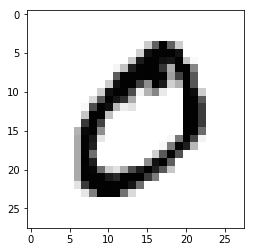

In [255]:
visualize_image(0)

##  Using this to learn MNIST

**Train the neural net for one epoch**

In [256]:
def _sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [257]:
def learn(X, Y, num_iter):
    np.random.seed(2)
    V = np.random.randn(784, 50)
    W = np.random.randn(50, 10)
    for j in range(num_iter):
        i = np.random.randint(0, num_iter)
        x = np.array(X[i], ndmin=2)
        y = np.array(Y[i], ndmin=2)
        A = np.dot(x,V)
        B = _sigmoid(A)
        C = np.dot(B,W)
        P = _sigmoid(C)
        sum_P = np.sum(P)
        L = 0.5 * (y - P) ** 2
        dLdP = -1.0 * (y-P)
        dPdC = _sigmoid(C) * (1-_sigmoid(C))
        dLdC = dLdP * dPdC
        dCdW = B.T
        dLdW = np.dot(dCdW, dLdC)
        dCdB = W.T
        dLdB = np.dot(dLdC, dCdB)
        dBdA = _sigmoid(A) * (1-_sigmoid(A))
        dLdA = dLdB * dBdA
        dAdV = x.T
        dLdV = np.dot(dAdV, dLdA)
        W -= dLdW
        V -= dLdV
    return V, W  

In [258]:
  def predict(X, V, W):
    A = np.dot(X,V)
    B = _sigmoid(A)
    C = np.dot(B,W)
    P = _sigmoid(C)
    return P

In [259]:
V, W = learn(X_train, Y_train, num_iter=X_train.shape[0])

In [260]:
P = predict(X_test, V, W)

In [261]:
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
print("Neural Net MNIST Classification Accuracy:", round(accuracy, 3) * 100, "percent")

Neural Net MNIST Classification Accuracy: 91.3 percent


91.3% accuracy. Not bad for a naive approach with zero tricks. However...

...it's far from optimal: [see here](http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html)

<img src='img/MNIST_performance.png' height=200>

# How can we do better?

## How can we do better?

* Building deeper nets
* Changing "learning rates" / using "learning rate decay"
* Adding "dropout"
* ...and that doesn't even cover many of the cutting edge techniques listed above

And of course, we have to build it from scratch.

**"What I cannot build, I cannot understand."**

--Richard Feynman

## Before:

With a neural net with one hidden layer, one pass through was 25 manually coded steps. 

_This will quickly get unweildy if we add more hidden layers._

## New understanding: "Layers"

To do "Deep Learning" you have to stop thinking of neural nets as a series of functions $ L = L(D(C(B(A(X, V)), W)) $.

### New understanding: "Layers"

Instead, we'll think of them as a series of layers:

Slide from March talk:

<img src='img/neural_net_layers.png' height=200>

## Coding the new neural network, layers

We'll define a `NeuralNetwork` class that defines a neural network as a series of `Layers`:

In [262]:
class NeuralNetwork(object):
    def __init__(self, layers, random_seed):
        self.layers = layers
        self.random_seed = random_seed
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            layer.initialize_weights()


    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for layer in self.layers:
            X_next = layer.fprop(X_next)
        prediction = X_next
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

### Coding the new neural network, layers

In [263]:
class Layer(object):
    def _setup(self, input_shape):
        """ Setup layer with parameters that are unknown at __init__(). """
        pass

    def fprop(self, input):
        """ Calculate layer output for given input (forward propagation). """
        raise NotImplementedError()

    def bprop(self, output_grad):
        """ Calculate input gradient. """
        raise NotImplementedError()

## Props

<img src="img/andersbll.png">

[Anders' GitHub](https://github.com/andersbll)

### Coding the new neural network, layers

In [264]:
class Linear(Layer):
    
    random_seed = None
    
    def __init__(self, n_in, n_out, 
                 activation_function):
        self.n_in = n_in
        self.n_out = n_out        
        self.iteration = 0
        self.activation_function = activation_function

    def initialize_weights(self):
        np.random.seed(seed=self.random_seed)
        self.W = np.random.normal(size=(self.n_in, self.n_out))

    def fprop(self, layer_input):
        self.layer_input = layer_input
        self.activation_input = np.dot(layer_input, self.W)
        return self.activation_function(self.activation_input, bprop=False)

    def bprop(self, layer_gradient):
        dOutdActivationInput = self.activation_function(self.activation_input, bprop=True)
        dLayerInputdActivationInput = layer_gradient * dOutdActivationInput
        dActivationOutputdActivationInput = self.layer_input.T
        output_grad = np.dot(dLayerInputdActivationInput, self.W.T)
        weight_update = np.dot(dActivationOutputdActivationInput, dLayerInputdActivationInput)
        W_new = self.W - weight_update
        self.W = W_new
        self.iteration += 1
        return output_grad

### Coding the new neural network, layers - and don't forget about that activation function!

In [265]:
def sigmoid(x, bprop=False):
    if bprop:
        s = sigmoid(x)
        return s*(1-s)
    else:
        return 1.0/(1.0+np.exp(-x))

## Running this neural network:

In [266]:
layer1 = Linear(n_in=784, n_out=10, activation_function=sigmoid)
layer2 = Linear(n_in=50, n_out=10, activation_function=sigmoid)

In [272]:
nn_mnist = NeuralNetwork(
    layers=[layer1, layer2],
    random_seed=2)

In [268]:
def neural_net_pass(net, x, y):
    pred = net.forwardpass(x)
    loss = net.loss(pred, y)
    net.backpropogate(loss)
    return pred

### Running this neural network

In [269]:
# Randomly shuffle the indices of the points in the training set:
np.random.seed(4)
train_size = X_train.shape[0]
indices = list(range(train_size))
np.random.shuffle(indices)

In [270]:
# Loop through every element in the training set: 
for index in indices:
    x = np.array(X_train[index], ndmin=2)
    y = np.array(Y_train[index], ndmin=2)
    neural_net_pass(nn_mnist, x, y)

In [271]:
P = nn_mnist.forwardpass(X_test)
preds = [np.argmax(x) for x in P]
actuals = [np.argmax(x) for x in Y_test]

accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
print("Neural Net MNIST Classification Accuracy:", round(accuracy, 3) * 100, "percent")

Neural Net MNIST Classification Accuracy: 73.3 percent


A different random weight initialization gave us just 82.3% accuracy this time.

### Running this neural network

#### Turning what we did above into a function

In [29]:
def train_test_net(net, X_train, Y_train, X_test, Y_test, random_seed):

    # Randomly set the seed
    np.random.seed(random_seed)
    
    # Randomly shuffle the indices of the points in the training set:
    train_size = X_train.shape[0]
    indices = list(range(train_size))
    np.random.shuffle(indices)
    
    # Loop through every element in the training set: 
    for index in indices:
        x = np.array(X_train[index], ndmin=2)
        y = np.array(Y_train[index], ndmin=2)
        neural_net_pass(net, x, y)
        
    P = net.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]

    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)

    return accuracy

# Deeper networks



Now that we've built a framework allowing us to define networks as a series of layers, we can easily build deeper networks.

In [40]:
input_layer = Linear(n_in=784, n_out=75, activation_function=sigmoid)
hidden_1 = Linear(n_in=75, n_out=50, activation_function=sigmoid)
hidden_2 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
hidden_3 = Linear(n_in=50, n_out=25, activation_function=sigmoid)
output_layer = Linear(n_in=25, n_out=10, activation_function=sigmoid)

In [41]:
def print_accuracy_net_layers(layers):
    # Define net
    net = NeuralNetwork(
        layers=layers,
        random_seed=2)

    accuracy_one_hidden = train_test_net(net, X_train, Y_train, X_test, Y_test, 4)
    
    return accuracy_one_hidden

## Deeper networks

In [32]:
accuracy = print_accuracy_net_layers([input_layer, 
                                      output_layer])
print("The accuracy of a network with one hidden layer was", np.round(accuracy * 100.0, 1))

The accuracy of a network with one hidden layer was 82.3


In [33]:
accuracy = print_accuracy_net_layers([input_layer, 
                                      hidden_1, 
                                      output_layer])
print("The accuracy of a network with two hidden layers was", np.round(accuracy * 100.0, 1))

The accuracy of a network with two hidden layers was 90.7


In [35]:
accuracy = print_accuracy_net_layers([input_layer, 
                                      hidden_1, 
                                      hidden_2,
                                      output_layer])
print("The accuracy of a network with three hidden layers was", np.round(accuracy * 100.0, 1))

The accuracy of a network with three hidden layers was 88.0


In [42]:
accuracy = print_accuracy_net_layers([input_layer, 
                                      hidden_1, 
                                      hidden_2,
                                      hidden_3,
                                      output_layer])
print("The accuracy of a network with four hidden layers was", np.round(accuracy * 100.0, 1))

The accuracy of a network with four hidden layers was 87.9


**"Deep Learning" can help, but we need more "tricks" to really get these things working.**

# Learning rate tuning

<img src="img/bengio.png">

"The learning rate is the single most important hyperparameter and one should always make sure it is tuned."

-[Yoshua Bengio](http://www.iro.umontreal.ca/~bengioy/yoshua_en/)

## Learning rate tuning

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers, random_seed, learning_rate):
        self.layers = layers
        self.random_seed = random_seed
        self.learning_rate = learning_rate
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            setattr(layer, 'learning_rate', self.learning_rate)
            layer.initialize_weights()


    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for layer in self.layers:
            X_next = layer.fprop(X_next)
        prediction = X_next
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

## Learning rate tuning

In [ ]:
class Linear(Layer):
    
    random_seed = None
    learning_rate = None
    
    def __init__(self, n_in, n_out, 
                 activation_function):
        self.n_in = n_in
        self.n_out = n_out        
        self.iteration = 0
        self.activation_function = activation_function

    def initialize_weights(self):
        np.random.seed(seed=self.random_seed)
        self.W = np.random.normal(size=(self.n_in, self.n_out))

    def fprop(self, layer_input):
        self.layer_input = layer_input
        self.activation_input = np.dot(layer_input, self.W)
        return self.activation_function(self.activation_input, bprop=False)

    def bprop(self, layer_gradient):
        dOutdActivationInput = self.activation_function(self.activation_input, bprop=True)
        dLayerInputdActivationInput = layer_gradient * dOutdActivationInput
        dActivationOutputdActivationInput = self.layer_input.T
        output_grad = np.dot(dLayerInputdActivationInput, self.W.T)
        weight_update = np.dot(dActivationOutputdActivationInput, dLayerInputdActivationInput)
        W_new = self.W - self.learning_rate * weight_update
        self.W = W_new
        self.iteration += 1
        return output_grad

## Learning rate tuning

In [ ]:
input_layer = Linear(n_in=784, n_out=50, activation_function=sigmoid)
hidden_1 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
output_layer = Linear(n_in=50, n_out=10, activation_function=sigmoid)

In [ ]:
def learning_rate_accuracy(learning_rate):
    
    net = NeuralNetwork(
        layers = [input_layer, hidden_1, output_layer],
        random_seed = 2,
        learning_rate = learning_rate
    )
    
    accuracy_lr = train_test_net(net, X_train, Y_train, X_test, Y_test, 4)
    print("The accuracy of a network with learning rate", learning_rate, "was", np.round(accuracy_lr * 100.0, 1))

    return accuracy_lr

In [ ]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
lr_accuracies = [learning_rate_accuracy(x) for x in learning_rates]

# Learning rate tuning: getting fancy

Because backpropogation involves multiplying a value by the derivative of the activation function, gradients (that tell the weights how to update) get smaller and smaller as you go get further from the output layer:

<img src="img/sigmoid_deriv_trask.png">
**At most, the gradient can be multiplied by 0.25 at each layer.** More [here](http://iamtrask.github.io/2015/07/12/basic-python-network/)

## Learning rate tuning: getting fancy

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers, 
                 random_seed, 
                 learning_rate):
        self.layers = layers
        self.random_seed = random_seed
        self.learning_rate = learning_rate
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            setattr(layer, 'learning_rate', 
                    self.learning_rate/(10.0 ** i))
            layer.initialize_weights()

    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for layer in self.layers:
            X_next = layer.fprop(X_next)
        prediction = X_next
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

## Learning rate tuning: getting fancy

In [ ]:
input_layer = Linear(n_in=784, n_out=50, activation_function=sigmoid)
hidden_1 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
output_layer = Linear(n_in=50, n_out=10, activation_function=sigmoid)

In [ ]:
def learning_rate_accuracy(learning_rate):
    
    net = NeuralNetwork(
        layers = [input_layer, hidden_1, output_layer],
        random_seed = 2,
        learning_rate = learning_rate
    )
    
    accuracy_lr = train_test_net(net, X_train, Y_train, X_test, Y_test, 4)
    
    print("The accuracy of a network with learning rate \n", learning_rate,
          "in the first layer \n", learning_rate / 10.0,
          "in the second layer, and \n", learning_rate / 100.0, 
          "in the third layer is", 
          np.round(accuracy_lr * 100.0, 1), "percent")

    return accuracy_lr

## Learning rate tuning: getting fancy

In [ ]:
learning_rates = [0.01, 0.1, 1, 10]
lr_accuracies = [learning_rate_accuracy(x) for x in learning_rates]

The accuracy is up to 91.8%, up from 90.7% before. We could also view that as roughly a 10% reduction in error rate. 

**Having a higher learning rate in earlier layers vs. later layers does help accuracy.** 

# Learning rate momentum

The weights in a neural net are updated according to:

$$ W =  W - \frac{\partial L}{\partial W}$$

Recall that this is equivalent to doing gradient descent with each parameter:

<img src="img/gradient_descent.png">

This is analogous to a ball rolling down a hill. 

Balls rolling down hills have momentum. So, therefore, should our weights!

## Learning rate momentum

Let's define our weight update $ \frac{\partial L}{\partial W} $ to be $ U_t $. Then, instead of our weight update being $ U_t $ at each time step, it will be:

$$ U_t + \mu * U_{t-1} + \mu^2 * U_{t-2} + ... $$ 

where $\mu$ is a decay parameter between 0 and 1.

This is equivalent to, and often described as, increasing your learning rate when your weight updates are going in the same direction, iteration after iteration, and lowering your learning rate when the opposite is happening.

## Implementing learning rate momentum

In [ ]:
class Linear(Layer):
    
    random_seed = None
    learning_rate = None
    momentum = None
    
    def __init__(self, n_in, n_out, 
                 activation_function):
        self.n_in = n_in
        self.n_out = n_out        
        self.iteration = None
        self.activation_function = activation_function
        self.velocity = None

    def initialize_weights(self):
        np.random.seed(seed=self.random_seed)
        self.W = np.random.normal(size=(self.n_in, self.n_out))
        self.velocity = np.zeros(shape=(self.n_in, self.n_out))

    def fprop(self, layer_input):
        self.layer_input = layer_input
        self.activation_input = np.dot(layer_input, self.W)
        return self.activation_function(self.activation_input, bprop=False)

    def bprop(self, layer_gradient):
        dOutdActivationInput = self.activation_function(self.activation_input, 
                                                        bprop=True)
        dLayerInputdActivationInput = layer_gradient * dOutdActivationInput
        dActivationOutputdActivationInput = self.layer_input.T
        output_grad = np.dot(dLayerInputdActivationInput, self.W.T)
        
        # Update velocity
        weight_update_current = np.dot(dActivationOutputdActivationInput, 
                                       dLayerInputdActivationInput)
        self.velocity = np.add(self.momentum * self.velocity, 
                               self.learning_rate * weight_update_current)
        self.W = self.W - self.velocity
        return output_grad

## Implementing learning rate momentum

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers, random_seed, learning_rate, momentum):
        self.layers = layers
        self.random_seed = random_seed
        self.momentum = momentum
        self.learning_rate = learning_rate
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            layer.initialize_weights()
            setattr(layer, 'learning_rate', self.learning_rate/(10.0 ** i))
            setattr(layer, 'momentum', self.momentum)

    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for layer in self.layers:
            X_next = layer.fprop(X_next)
        prediction = X_next
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

## Implementing learning rate momentum

In [ ]:
input_layer = Linear(n_in=784, n_out=50, activation_function=sigmoid)
hidden_1 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
output_layer = Linear(n_in=50, n_out=10, activation_function=sigmoid)

In [ ]:
def learning_rate_accuracy(learning_rate, momentum):
    
    net = NeuralNetwork(
        layers = [input_layer, hidden_1, output_layer],
        random_seed = 2,
        learning_rate = learning_rate,
        momentum = momentum
    )
    
    accuracy_lr = train_test_net(net, X_train, Y_train, X_test, Y_test, 4)
    
    print("The accuracy of a network with learning rate \n", learning_rate,
          "in the first layer \n", learning_rate / 10.0,
          "in the second layer, and \n", learning_rate / 100.0, 
          "in the third layer, and \n momentum", momentum, "is",
          np.round(accuracy_lr * 100.0, 1), "percent")

    return accuracy_lr

## Learning rate momentum results

In [ ]:
learning_rates = [1]
momentum = [0.5, 0.75, 0.9]
for learning_rate in learning_rates:
    for m in momentum:
        learning_rate_accuracy(learning_rate, m)

Here, we get a practical lesson: **throwing the "kitchen sink" of neural net tricks at a problem in unnecessary at best and actually harmful at worst.** 

Indeed, learning rate momentum has been shown to work on Recurrent Neural Nets, not fully connected neural nets as we have here. See 
[Bengio et. al. (2014)](https://arxiv.org/pdf/1212.0901v2.pdf).

# Dropout

Dropout can help prevent neural networks from overfitting. It involves "dropping" a portion of the neurons - that is, setting their values to zero - on each forward pass through the network. 

<img src="img/dropout.png">

This nudges the network toward learning "redundant representations of its data".

## Dropout

In [ ]:
class NeuralNetworkDropout(object):
    def __init__(self, layers, random_seed, 
                 learning_rate, momentum, dropout):
        self.layers = layers
        self.random_seed = random_seed
        self.momentum = momentum
        self.dropout = dropout
        self.learning_rate = learning_rate
        self.iteration = 0
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            layer.initialize_weights()
            setattr(layer, 'learning_rate', self.learning_rate/(10.0 ** i))
            setattr(layer, 'momentum', self.momentum)

    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for i, layer in enumerate(self.layers):
            np.random.seed(seed=self.random_seed+i*self.iteration)
            if self.dropout:
                zero_indices = np.random.choice(range(layer.n_in), 
                                                size=int(layer.n_in * (1 - self.dropout)), 
                                                replace=False)
                X_next[:, zero_indices] = 0.0
            X_next = layer.fprop(X_next)
        prediction = X_next
        self.iteration += 1
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

## Dropout

In [ ]:
def train_test_net_dropout(net, X_train, Y_train, X_test, Y_test, random_seed):

    # Randomly set the seed
    np.random.seed(random_seed)
    
    # Randomly shuffle the indices of the points in the training set:
    train_size = X_train.shape[0]
    indices = list(range(train_size))
    np.random.shuffle(indices)
    
    # Loop through every element in the training set: 
    for index in indices:
        x = np.array(X_train[index], ndmin=2)
        y = np.array(Y_train[index], ndmin=2)
        neural_net_pass(net, x, y)
        
    net.dropout = None
    P = net.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]

    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    
    return accuracy

## Dropout

In [ ]:
input_layer = Linear(n_in=784, n_out=50, activation_function=sigmoid)
hidden_1 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
output_layer = Linear(n_in=50, n_out=10, activation_function=sigmoid)

In [ ]:
def learning_rate_dropout(dropout):
    
    net = NeuralNetworkDropout(
        layers = [input_layer, hidden_1, output_layer],
        random_seed = 2,
        learning_rate = 1,
        momentum = 0.5,
        dropout = dropout
    )
    
    accuracy_lr = train_test_net_dropout(net, X_train, Y_train, X_test, Y_test, 4)
    
    print("The accuracy of a network with dropout", dropout, "is",
          np.round(accuracy_lr * 100.0, 1), "percent")

    return accuracy_lr

## Testing dropout

In [ ]:
dropouts = [1, 0.5, 0.75, 0.9]
lr_accuracies = [learning_rate_dropout(x) for x in dropouts]

**Adding dropout did _not_ improve accuracy.** Our network was not overfitting in this case.

# Last one, just for fun: DropConnect

As we saw above, the highest performance model on the MNIST data involved "Drop Connect", where a portion of the _weights_ in the neural net are set to zero, as opposed to half the _neurons_.

[Not in TensorFlow!](https://stackoverflow.com/questions/37135885/dropconnect-in-tensorflow)

<img src="img/drop_connect.png">

## DropConnect 

In [ ]:
class NeuralNetwork(object):
    def __init__(self, layers, random_seed, 
                 learning_rate, momentum, drop_connect,
                 dropout=None):
        self.layers = layers
        self.random_seed = random_seed
        self.momentum = momentum
        self.dropout = dropout
        self.drop_connect = drop_connect
        self.learning_rate = learning_rate
        self.iteration = 0
        for i, layer in enumerate(self.layers):
            setattr(layer, 'random_seed', self.random_seed+i)
            layer.initialize_weights()
            setattr(layer, 'learning_rate', self.learning_rate/(10.0 ** i))
            setattr(layer, 'momentum', self.momentum)
            setattr(layer, 'drop_connect', self.drop_connect)

    def forwardpass(self, X):
        """ Calculate an output Y for the given input X. """
        X_next = X
        for i, layer in enumerate(self.layers):
            np.random.seed(seed=self.random_seed+i*self.iteration)
            if self.dropout:
                zero_indices = np.random.choice(range(layer.n_in), 
                                                size=int(layer.n_in * (1 - self.dropout)), 
                                                replace=False)
                X_next[:, zero_indices] = 0.0
            X_next = layer.fprop(X_next)
        prediction = X_next
        self.iteration += 1
        return prediction

    def loss(self, prediction, Y):
        """ Calculate error on the given data. """
        loss = 0.5 * (Y - prediction) ** 2
        return -1.0 * (Y - prediction)

    def backpropogate(self, loss):
        """ Calculate an output Y for the given input X. """
        loss_next = loss
        for layer in reversed(self.layers):
            loss_next = layer.bprop(loss_next)
        return loss

## DropConnect

In [ ]:
def apply_drop_connect_weights(weights, drop_connect):
    new_weights = weights.copy()
    num_weights = new_weights.shape[0] * new_weights.shape[1]
    reshaped_weights = np.reshape(new_weights, (num_weights, 1))
    zero_indices = np.random.choice(range(num_weights), 
                                    size=int(num_weights * (1 - drop_connect)), 
                                    replace=False)
    reshaped_weights[zero_indices, :] = 0.0
    drop_connected_weights = np.reshape(reshaped_weights, new_weights.shape)
    
    return drop_connected_weights

## DropConnect

In [ ]:
class Linear(Layer):
    
    random_seed = None
    learning_rate = None
    momentum = None
    drop_connect = None
    
    def __init__(self, n_in, n_out, 
                 activation_function):
        self.n_in = n_in
        self.n_out = n_out        
        self.iteration = 0
        self.activation_function = activation_function
        self.velocity = None

    def initialize_weights(self):
        np.random.seed(seed=self.random_seed)
        self.W = np.random.normal(size=(self.n_in, self.n_out))
        self.velocity = np.zeros(shape=(self.n_in, self.n_out))

    def fprop(self, layer_input):
        self.layer_input = layer_input
        if self.drop_connect:            
            drop_connected_weights = apply_drop_connect_weights(self.W, 
                                                                self.drop_connect)
            self.activation_input = np.dot(layer_input, 
                                           drop_connected_weights)
        else:
            self.activation_input = np.dot(layer_input, self.W)
        self.iteration += 1
        return self.activation_function(self.activation_input, bprop=False)

    def bprop(self, layer_gradient):
        dOutdActivationInput = self.activation_function(self.activation_input, 
                                                        bprop=True)
        dLayerInputdActivationInput = layer_gradient * dOutdActivationInput
        dActivationOutputdActivationInput = self.layer_input.T
        output_grad = np.dot(dLayerInputdActivationInput, self.W.T)
        
        # Update velocity
        weight_update_current = np.dot(dActivationOutputdActivationInput, 
                                       dLayerInputdActivationInput)
        self.velocity = np.add(self.momentum * self.velocity, 
                               self.learning_rate * weight_update_current)
        self.W = self.W - self.velocity
        return output_grad

## DropConnect

In [ ]:
def train_test_net_drop_connect(net, X_train, Y_train, X_test, Y_test, random_seed):

    # Randomly set the seed
    np.random.seed(random_seed)
    
    # Randomly shuffle the indices of the points in the training set:
    train_size = X_train.shape[0]
    indices = list(range(train_size))
    np.random.shuffle(indices)
    
    # Loop through every element in the training set: 
    for index in indices:
        x = np.array(X_train[index], ndmin=2)
        y = np.array(Y_train[index], ndmin=2)
        neural_net_pass(net, x, y)
        
    net.drop_connect = None
    P = net.forwardpass(X_test)
    preds = [np.argmax(x) for x in P]
    actuals = [np.argmax(x) for x in Y_test]

    accuracy = sum(np.array(preds) == np.array(actuals)) * 1.0 / len(preds)
    
    return accuracy

## DropConnect

In [ ]:
def learning_rate_drop_connect(drop_connect):
    
    net = NeuralNetwork(
        layers = [input_layer, hidden_1, output_layer],
        random_seed = 2,
        learning_rate = 1,
        momentum = 0.5,
        drop_connect = drop_connect
    )

    accuracy_lr = train_test_net_drop_connect(net, X_train, Y_train, X_test, Y_test, 4)
    
    print("The accuracy of a network with drop_connect", 
          drop_connect, "is",
          np.round(accuracy_lr * 100.0, 1), "percent")

    return accuracy_lr

In [ ]:
input_layer = Linear(n_in=784, n_out=50, activation_function=sigmoid)
hidden_1 = Linear(n_in=50, n_out=50, activation_function=sigmoid)
output_layer = Linear(n_in=50, n_out=10, activation_function=sigmoid)

## DropConnect

In [ ]:
drop_connect_values = [1, 0.5, 0.75, 0.9]
lr_accuracies = [learning_rate_drop_connect(x) for x in drop_connect_values]

This network, not being convolutional, is likely _underfitting_ rather than _overfitting_ the data.

# Conclusion

There are a lot of "tricks" to improve the training of neural nets. **Now you know not just conceptually what those tricks are doing, but how to implement them.** You may even be able to implement a few of your own!

## Next time:

We'll examine:
* Different activation functions! (here we only used boring ol' sigmoid)
* Different weight initializations

## Next next time

* Convolutional layers (yes, from scratch)
* Recurrent neural nets (including LSTMs, omg)

## Next steps for you

Go to [the GitHub repo for this talk](https://github.com/SethHWeidman/neural_net_talks).

Star, fork, and contribute!